In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
veri = pd.read_csv("mnist_test.csv")
print("Verinin Boyutu: ",veri.shape)
veri.head()

Verinin Boyutu:  (10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y_veri = veri["label"]
X_veri = veri.drop(["label"],axis=1)
print("Xveri :", X_veri.shape)
print("Yveri :", Y_veri.shape)

Xveri : (10000, 784)
Yveri : (10000,)


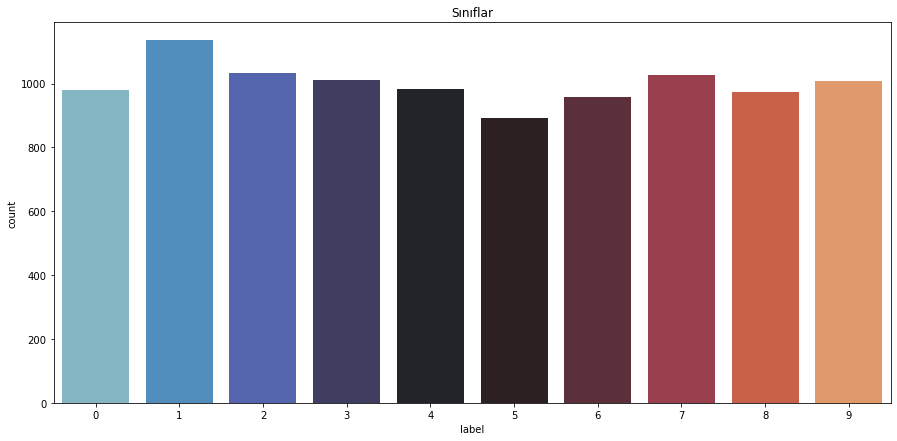

Sınıflar ve Örnek Sayıları 1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64


In [4]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_veri,palette="icefire")
plt.title("Sınıflar")
plt.show()
print("Sınıflar ve Örnek Sayıları",Y_veri.value_counts())

In [5]:
resim_boyutu = int(np.sqrt(X_veri.shape[1]))
resim_boyutu

28

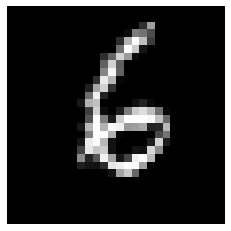

In [6]:
resim1 = X_veri.iloc[2000].values
resim1 = resim1.reshape(resim_boyutu,resim_boyutu)
plt.imshow(resim1,cmap="gray")
plt.axis('off')
plt.show()

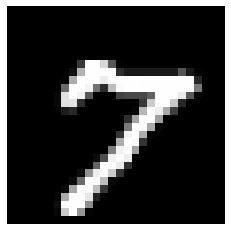

In [7]:
resim2 = X_veri.iloc[9000].values
resim2 = resim2.reshape(resim_boyutu,resim_boyutu)
plt.imshow(resim2,cmap="gray")
plt.axis('off')
plt.show()

In [8]:
#                          Normalize Yeniden Şekillendirme ve Etiket Kodlama

# Keras 3 boyutlu veri istediği için biz bu veriyi 28*28*1 olarak vericeğiz. 3. boyut renk için normalde bizde renk yok ama

x_veri = X_veri / 255.0
# 255 bölmemizin nedeni bütün değerler 255 ton değeri vardır. bundan sonra değerler 0-1 arasında olur.

In [9]:
X_veri = X_veri.values.reshape(-1,28,28,1)
print("X eğitim boyutu: ", X_veri.shape)

X eğitim boyutu:  (10000, 28, 28, 1)


In [10]:
# etiket kodlama
from keras.utils.np_utils import to_categorical # vektöre çevirmek için
Y_veri = to_categorical(Y_veri, num_classes=10)
# 0-9 arasındaki rakamlar olduğuu içintoplamda 10 classter olucak. Buna göre etiket değerlerini çevirdik.

In [11]:
# Eğitim Test Bölmesi

from sklearn.model_selection import train_test_split
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X_veri,Y_veri,test_size=0.1,random_state=2)

print("X egitim: ",X_egitim.shape)
print("X test: ",X_test.shape)
print("y egitim: ",Y_egitim.shape)
print("y test: ",Y_test.shape)

X egitim:  (9000, 28, 28, 1)
X test:  (1000, 28, 28, 1)
y egitim:  (9000, 10)
y test:  (1000, 10)


In [14]:
# özellik algılayıcı kenarları veya dış bükey şeiklleri algılamaya yöneliktir.
# evrişim katmanında bir resmin sabit dururken diğer resmi onun farklı yerleriyle kaşılaştırır (gezinirerek arıyor gibi)
# ReLU eksi olan değerleri pozitif yapıyor (evrişim katmanındaki işlemlerde kullanılıyor sanırım)
# evrişim katmanını sürekli uyguladığımızda resmin boyutu küçülüyor. Bilgi kaybetmemek için piksel eklemesi yapıyoruz.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

"""
1=> confusion matrix hesaplamak için. Hangilerini iyi ayır ettik ya da ayırt edemedik görmek için
2=> iteratif işlemler için.
3=> kategorikleri istenilene (0001000 gibi) çevirmek için kullanıcağız
4=> modellerden Sequential modeli seçtik
5=> evriştirme, ortaklama,seyreltme gibi işlemler için gerekli olan şeyler
6=> optimize etmek için kullanıcaklarım
7=> görüntüyü ön işlemek için. Resimlerin çoklanması için kullanılabilir mesela
8=> ?
"""
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [15]:
model = Sequential()
# sırasıyla: evrişim, ortaklama, seyreltme kodları
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [17]:
# Adam optimizasyon yöntemini kullanacağız
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [20]:
# modelin derlenmesi 
# kategorik çapcar entropi maliyet yöntemini kullanacağız

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [21]:
"""
10 örnek içeren bir veri kümesi olduğunu varsayalım
batch_size = 2 olsun
epoch = 3 olsun
Her bir epoch için 5 adet batch'e sahibiz (10/2)
10 adet veri, her epoch da 2'şerli olarak 5 kere döngüsünü tamamlar
"""

epochs = 10  
batch_size = 250

In [22]:
# Veri arttırma (data augmentation)
# ezberleme sorununu gidermek için yapılır. Bir resmi çevirerek büyültüp küçülterek veriyi çoğaltır.

datagen = ImageDataGenerator(
        featurewise_center=False,  # girdi ortalamasını veri üzerinden 0 olarak ayarlayın
        samplewise_center=False,  # her bir örnek ortalamasını 0 olarak ayarlayın 
        featurewise_std_normalization=False,  # girdileri veri kümesinin standartlarına böl
        samplewise_std_normalization=False,  # her girdiyi std'ye böl
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # boyut küçültme
        zoom_range = 0.1, # %10 görüntüyü yakınlaştırır
        width_shift_range=0.1,  # görüntüleri yatay olarak rastgele kaydırır %10
        height_shift_range=0.1,  # görüntüleri dikey olarak rastgele kaydırır %10
        horizontal_flip=False,  # görüntüleri yatay olarak rastgele çevirir
        vertical_flip=False)  # görüntüleri dikey olarak rastgele çevirir

datagen.fit(X_egitim)

In [23]:
# Modelin Eğitilmesi

history = model.fit_generator(datagen.flow(X_egitim,Y_egitim, 
                                           batch_size=batch_size),
                              epochs = epochs, 
                              validation_data = (X_test,Y_test), steps_per_epoch=X_egitim.shape[0] // batch_size)

Epoch 1/10
36/36 [==============================] - 7s 51ms/step - loss: 11.6563 - accuracy: 0.2316 - val_loss: 2.0048 - val_accuracy: 0.3720
Epoch 2/10
36/36 [==============================] - 2s 43ms/step - loss: 2.0855 - accuracy: 0.2781 - val_loss: 1.6527 - val_accuracy: 0.5860
Epoch 3/10
36/36 [==============================] - 2s 44ms/step - loss: 1.9009 - accuracy: 0.3523 - val_loss: 1.2588 - val_accuracy: 0.6880
Epoch 4/10
36/36 [==============================] - 2s 44ms/step - loss: 1.6914 - accuracy: 0.4329 - val_loss: 0.9635 - val_accuracy: 0.7580
Epoch 5/10
36/36 [==============================] - 2s 43ms/step - loss: 1.5495 - accuracy: 0.4761 - val_loss: 0.7385 - val_accuracy: 0.7970
Epoch 6/10
36/36 [==============================] - 2s 46ms/step - loss: 1.4162 - accuracy: 0.5233 - val_loss: 0.6286 - val_accuracy: 0.8170
Epoch 7/10
36/36 [==============================] - 2s 48ms/step - loss: 1.2935 - accuracy: 0.5596 - val_loss: 0.5606 - val_accuracy: 0.8400
Epoch 8/10
3

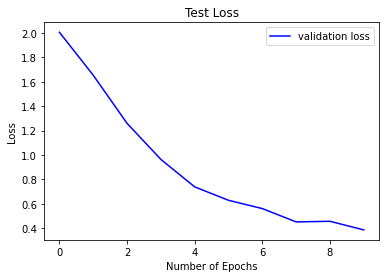

In [25]:
# modelin değerlendirilmesi

plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

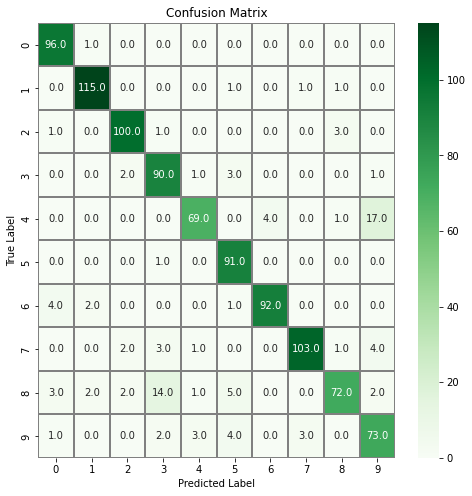

In [26]:
# confusion matrix
import seaborn as sns

# veri test setinden tahmin et
Y_pred = model.predict(X_test)

# tahmin edilen veriyi çevir
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# test verisini çevir
Y_true = np.argmax(Y_test,axis = 1) 

# karışıklık matrixini hesapla
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# karışıklık matrixini çizdir
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [1]:
#                                          Tekrarlayan Sinir Ağları
# tekrarlayan sinir ağları aldıkları girdiyle ilgili önemli şeyleri hatırlayabilir ve bu onların bir sonraki adımın ne olacağını
# tahmin etmede çok hassas olmalarını sağlar
# Tekrarlayan sinir ağlarının asıl amacı ardışık bilgileri kullanmaktır.

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("uluslar_arası_havayolu_yolcıları.csv")
data.head()

In [ ]:
# veri görselleştirme
data = dataset.iloc[:,1].values
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.show()

In [ ]:
# verinin şeklini ve tipini değiştir
data =data.reshape(-1,1)
data.astype("float32")
data.shape

In [ ]:
# normalize edelim
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data)
data_scaled[:4]

In [ ]:
# veriyi eğitim test olarak bölelim
# verinin %60'lık ilk kısmı eğitim geri kalanı da test olsun
# zaman serisi olduğu için geçmişten geliceğe gidilicektir try_test_split ile karıştırarak almamaız lazım
train_data_size = int(len(data_scaled)*0.60)
test_data_size = len(data_scaled) - train_data_size
train = data_scaled[0:train_data_size,:]
test = data_scaled[train_data_size:len(data_scaled),:]
print("Train data size is {}".format(len(train)))
print("Test data size is {}".format(len(test)))

In [ ]:
# Eğitim verisini 10'ar lı olarak şekillendirelim
x_train = []
y_train = []
time_steps=10
for i in range(len(train)-time_steps-1):
    a = train[i:(i+time_steps),0]
    x_train.append(a)
    y_train.append(train[i + time_steps,0])
trainX = np.array(x_train)
trainY = np.array(y_train)

In [ ]:
# test verisini 10'ar lı olarak şekillendirelim
x_test = []
y_test = []
for i in range(len(test)-time_steps-1):
    a = test[i:(i+time_steps),0]
    x_test.append(a)
    y_test.append(test[i + time_steps,0])
testX = np.array(x_test)
testY = np.array(y_test)

In [ ]:
# verinin şeklini kerasa uygun hale getirelim
# ((76, 10, 1) ilk satır) böylelikle kerasın istediği şekilde boyutlandırdık
"""
    'np.reshape'  boyutlandırmaya yarıyor.
"""
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1],1))
print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))

In [ ]:
# Create RNN Model

from keras.layers import Dense, SimpleRNN, Dropout
from keras.metrics import mean_squared_error
from keras.models import Sequential

# tekrarlanan sinir ağlarının temelini oluşturur.
model = Sequential()

# ilk katman ve drop out katmanı
# input_shape yi 1 katmanda vermek yeterli.
model.add(SimpleRNN(units=120,
                    activation='relu',
                    return_sequences=True, 
                    input_shape=(trainX.shape[1],1)))
model.add(Dropout(0.20))

# ikinci katman ve drop out katmanı
model.add(SimpleRNN(units = 80, 
                    activation='relu',
                    return_sequences=True))
model.add(Dropout(0.20))

# üçüncü katman ve drop out katmanı
model.add(SimpleRNN(units = 40, 
                    activation='relu', 
                    return_sequences= True))
model.add(Dropout(0.20))

# dördüncü katman ve drop out katmanı
model.add(SimpleRNN(units = 20,
                        activation='relu',
                        return_sequences=True))
model.add(Dropout(0.20))

# beşinci katman ve drop out katmanı
model.add(SimpleRNN(units = 10))
model.add(Dropout(0.20))

# tek bir çıktı olucak
model.add(Dense(units=1))

# derleyelim
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# eğitimi başlatalım
model.fit(trainX, trainY, epochs = 250, batch_size=32,verbose=0)

In [ ]:
# tahmin modelinin değerlendirilmesi
# modelin değerlendirilmesinde kök-ortalama-kare hatası yöntemini  kullanacağız.

import math
from sklearn.metrics import mean_squared_error

trainPrediction = model.predict(trainX)
testPrediction = model.predict(testX)

# normalize etmiştik normale çevirelim
trainPrediction = scaler.inverse_transform(trainPrediction)
trainY = scaler.inverse_transform([trainY])
testPrediction = scaler.inverse_transform(testPrediction)
testY = scaler.inverse_transform([testY])

# kök ortalama kare hatası
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPrediction[:,0]))
testScore = math.sqrt(mean_squared_error(testY[0], testPrediction[:,0]))
print("Train Score is %.2lf RMSE"%(trainScore))
print("Test Score is %.2lf RMSE"%(testScore))

In [ ]:
# erğitim verisini kaydır
# "np.empty_like" belirli bir diziyle aynı şekle ve türe sahip yeni bir dizi döndürür
# burda eğtim verisinin tahnimlerini başta test verisinin tahminlerini ise sonda ekledik
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPrediction)+time_steps, :] = trainPrediction

#test verisini kaydır
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPrediction)+(time_steps*2)+1:len(dataset)-1, :] = testPrediction

#görselleştir
plt.plot(scaler.inverse_transform(data_scaled),label = 'True Values', color='blue')
plt.plot(trainPredictPlot,label='Train Prediction', color='red')
plt.plot(testPredictPlot,label = 'Test Prediction', color='green')
plt.xlabel("Time")
plt.ylabel("Number of Passengers")
plt.title("International Airline Passengers")
plt.legend()
plt.show()

In [6]:
#                                 Tekrarlayan sinir ağları
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [7]:
# ortamı oluştur (bu kod kendi otomatik bir tane oluşturur istersen kendinde ayarlayabilirsin)
env = gym.make('FrozenLake-v1')
env

<TimeLimit<FrozenLakeEnv<FrozenLake-v1>>>

In [8]:
# Q table oluştur
q_table = np.zeros([env.observation_space.n,env.action_space.n])
q_table

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
# Hyperparametreler
gamma = 0.95 # indirim faktörü
alpha = 0.80 #zamansal farkın ne kadar ağırlıklı olduğunu gösterir (formülde en son kısımda zamansal farkla çarpılıyor)
epsilon = 0.10 # risk alma faktörü (rastgele gidiyim deme lüksü)

# ödülleri görselleştirmek için liste oluştur
reward_list = []

In [11]:
# öğrenmeye başlama
eposide_number = 100000 # 100000 bölüm olsun
for i in range(1,eposide_number):
    state = env.reset() # her bölümün başında ortamı resetler
    
    reward_cound = 0
    
    while True:
        # %10 keşif, %90 sömürü oranı
        # 0-1 arasında düzgü dağılıma uygun bir sayı üretir epsilondan küçükse rastgele hareket yapıcak ama geçerli bi hareket yapıcak bi anda başka bir yere ışınlanmıyacak
        # değilse en çıkarcı eylemi yerine getirir
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        
        # ortam içerisinide bir eylem yap, karşılığında bir sonraki durumu ve
        # if de verdiğimiz eylemleri gerçekleştirir. bir sonraki stateyi verdi, kazandığın ödülü verdi ve bu işlem yapıldı diye done döndürdü.
        next_state, reward, done, _ = env.step(action)
        
        # Q öğrenme fonksiyonu
        old_value = q_table[state,action] # old_value (alamazsan BTK veri maratonu 10 gün  4:43:40 dk da anlatıyor)
        next_max = np.max(q_table[next_state]) # next_max
        
        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)
        
        # Q tablosunu güncelle
        q_table[state,action] = next_value
        
        # durum güncelle
        state = next_state
        
        # toplam ödülü hesapla
        reward_cound += reward
        
        # eğer bölüm bittiyse kır ve yeni bölüme başla
        if done:
            break
    
    if i%5000 == 0:
        print("Eposide: {}".format(i))
    if i%1000 == 0:
        reward_list.append(reward_cound)

Eposide: 5000
Eposide: 10000
Eposide: 15000
Eposide: 20000
Eposide: 25000
Eposide: 30000
Eposide: 35000
Eposide: 40000
Eposide: 45000
Eposide: 50000
Eposide: 55000
Eposide: 60000
Eposide: 65000
Eposide: 70000
Eposide: 75000
Eposide: 80000
Eposide: 85000
Eposide: 90000
Eposide: 95000


Text(0, 0.5, 'Ödül')

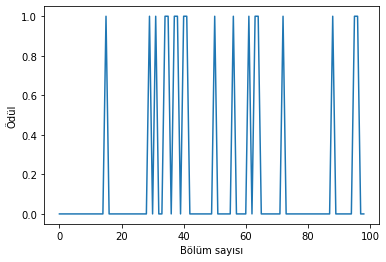

In [12]:
# ödülü göselleştir
plt.figure()
plt.plot(reward_list)
plt.xlabel("Bölüm sayısı")
plt.ylabel("Ödül")

In [13]:
q_table

array([[3.31450002e-01, 6.26850676e-02, 2.33401675e-01, 3.27820890e-02],
       [1.74891081e-02, 3.22964508e-02, 2.96041277e-02, 3.12902411e-01],
       [1.42487212e-01, 1.92272121e-02, 2.78718506e-02, 2.10938638e-02],
       [7.10229077e-03, 1.11856564e-03, 1.35351594e-03, 2.51242055e-02],
       [2.80848918e-01, 3.35675956e-02, 2.92120517e-02, 1.96861011e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.53518881e-02, 7.38790717e-05, 1.15805774e-04, 1.36062162e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.25266725e-02, 1.24985825e-02, 1.63985718e-02, 5.11315166e-01],
       [2.10742615e-02, 6.02250613e-01, 3.76294924e-02, 2.33430359e-03],
       [5.89256353e-01, 5.90532983e-03, 4.15301031e-04, 2.13278609e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.76994661e-01, 1.38147209e-01, 6.14484623e